In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import stargazer
from IPython.core.display import HTML

In [3]:
data = pd.read_csv("contodata.csv")
data.head()

,CustomerKey,SalesQuantity,UnitPrice,Education,Gender,MaritalStatus,YearlyIncome,Occupation,SalesAmount,Sum of DiscountAmount,Age
0,2,38,480.4,Bachelors,M,S,60000,Professional,15902,2355,36
1,3,38,472.3,Bachelors,M,M,60000,Professional,15650,2297,36
2,97,38,486.4,Bachelors,M,M,60000,Professional,16108,2375,39
3,100,38,488.5,Bachelors,M,M,60000,Professional,16172,2391,40
4,444,38,486.6,Bachelors,F,S,60000,Professional,16156,2334,25


In [4]:
df = data[["SalesQuantity","UnitPrice","Education","Gender","MaritalStatus","YearlyIncome","SalesAmount","Sum of DiscountAmount","Age"]]

In [5]:
df.head()

,SalesQuantity,UnitPrice,Education,Gender,MaritalStatus,YearlyIncome,SalesAmount,Sum of DiscountAmount,Age
0,38,480.4,Bachelors,M,S,60000,15902,2355,36
1,38,472.3,Bachelors,M,M,60000,15650,2297,36
2,38,486.4,Bachelors,M,M,60000,16108,2375,39
3,38,488.5,Bachelors,M,M,60000,16172,2391,40
4,38,486.6,Bachelors,F,S,60000,16156,2334,25


In [6]:
df.describe()

,SalesQuantity,UnitPrice,YearlyIncome,SalesAmount,Sum of DiscountAmount,Age
count,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000
mean,52.569009,324.082838,57304.009089,14110.757723,1299.443976,41.549857
std,23.550477,136.894157,32285.819419,6400.045086,877.636299,11.334963
min,30.000000,94.200000,10000.000000,2617.000000,243.000000,21.000000
25%,37.000000,126.300000,30000.000000,10799.000000,682.000000,33.000000
50%,40.000000,374.000000,60000.000000,13789.000000,933.000000,40.000000
75%,67.000000,404.200000,70000.000000,15986.500000,2081.000000,49.000000
max,127.000000,579.400000,170000.000000,32128.000000,4027.000000,94.000000


In [7]:
df = df.rename({"Sum of DiscountAmount":"Discount","SalesQuantity":"Quantity","YearlyIncome":"Income","SalesAmount":"Sales"},axis='columns')
df.head()

,Quantity,UnitPrice,Education,Gender,MaritalStatus,Income,Sales,Discount,Age
0,38,480.4,Bachelors,M,S,60000,15902,2355,36
1,38,472.3,Bachelors,M,M,60000,15650,2297,36
2,38,486.4,Bachelors,M,M,60000,16108,2375,39
3,38,488.5,Bachelors,M,M,60000,16172,2391,40
4,38,486.6,Bachelors,F,S,60000,16156,2334,25


In [8]:
Inc = df['Income']

Text(0.5, 1.0, 'Histogram of Income Level')

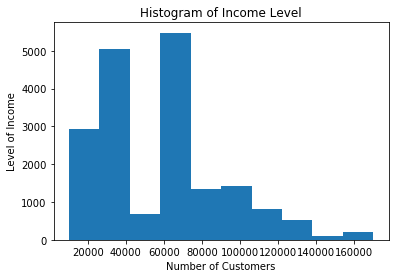

In [10]:
# Distribution of Income

Inc.hist(grid=False)
plt.xlabel("Number of Customers")
plt.ylabel("Level of Income")
plt.title("Histogram of Income Level")

In [12]:
dd = df["Quantity"]

Text(0.5, 1.0, 'Histogram of Quantity Demanded by Customers')

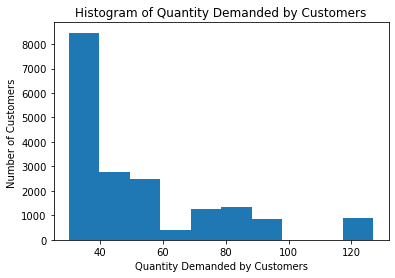

In [14]:
# Distribution of Quantity Demanded

dd.hist(grid=False)
plt.xlabel("Quantity Demanded by Customers")
plt.ylabel("Number of Customers ")
plt.title("Histogram of Quantity Demanded by Customers")

Text(0.5, 1.0, 'Histogram of Age of Customers')

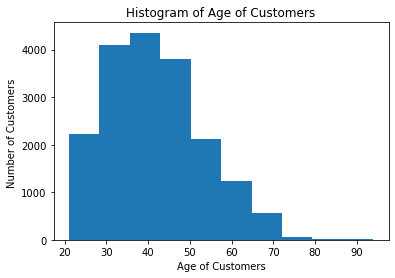

In [15]:
#Distribution of Customers Age

Aged = df["Age"]

Aged.hist(grid=False)
plt.xlabel("Age of Customers")
plt.ylabel("Number of Customers ")
plt.title("Histogram of Age of Customers")

Text(0.5, 1.0, 'Histogram of Customers Sales')

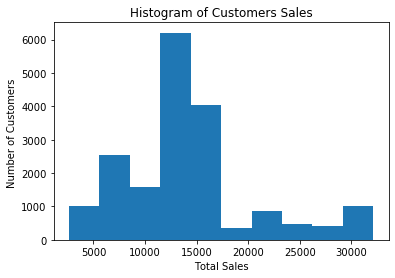

In [16]:
#Distribution of Sales

Sals = df["Sales"]

Sals.hist(grid=False)
plt.xlabel("Total Sales")
plt.ylabel("Number of Customers ")
plt.title("Histogram of Customers Sales")

Text(0.5, 1.0, "Histogram of Customers' Educational Level")

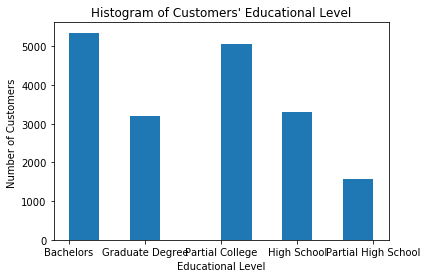

In [17]:
#Distribution of Educational Level

Educ = df["Education"]

Educ.hist(grid=False)
plt.xlabel("Educational Level")
plt.ylabel("Number of Customers ")
plt.title("Histogram of Customers' Educational Level")

In [18]:
df.describe()

,Quantity,UnitPrice,Income,Sales,Discount,Age
count,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000
mean,52.569009,324.082838,57304.009089,14110.757723,1299.443976,41.549857
std,23.550477,136.894157,32285.819419,6400.045086,877.636299,11.334963
min,30.000000,94.200000,10000.000000,2617.000000,243.000000,21.000000
25%,37.000000,126.300000,30000.000000,10799.000000,682.000000,33.000000
50%,40.000000,374.000000,60000.000000,13789.000000,933.000000,40.000000
75%,67.000000,404.200000,70000.000000,15986.500000,2081.000000,49.000000
max,127.000000,579.400000,170000.000000,32128.000000,4027.000000,94.000000


In [19]:
# Comparing Age distribution of customers less than and greater than 45

less45 = (df['Age']<45)
over45 = (df['Age']>=45)

In [20]:
import scipy.stats as stats

In [21]:
df.head(2)

,Quantity,UnitPrice,Education,Gender,MaritalStatus,Income,Sales,Discount,Age
0,38,480.4,Bachelors,M,S,60000,15902,2355,36
1,38,472.3,Bachelors,M,M,60000,15650,2297,36


In [24]:
from empiricaldist import Pmf

In [32]:
# Distribution of Age by Sex of Customers

In [28]:
age = df["Age"]

In [26]:
male = (df["Gender"]=="M")
female = (df['Gender']=="F")

In [29]:
male_age = age[male]
female_age = age[female]

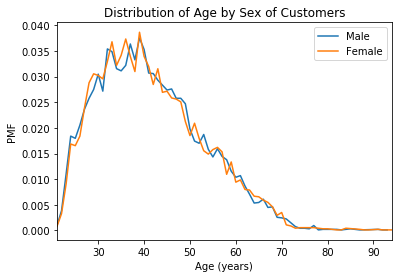

In [31]:
pmf_male_age = Pmf.from_seq(male_age)
pmf_male_age.plot(label="Male")

pmf_female_age = Pmf.from_seq(female_age)
pmf_female_age.plot(label="Female")

plt.xlabel("Age (years)")
plt.ylabel("PMF")
plt.title("Distribution of Age by Sex of Customers")
plt.legend();

In [33]:
# Distribution of sales by Gender

sales = df['Sales']

male = (df["Gender"]=="M")
female = (df['Gender']=="F")

In [34]:
male_sales = sales[male]
female_sales = sales[female]

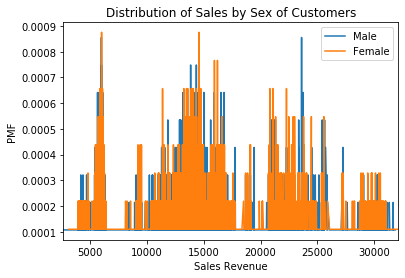

In [35]:
pmf_male_sales = Pmf.from_seq(male_sales)
pmf_male_sales.plot(label="Male")

pmf_female_sales = Pmf.from_seq(female_sales)
pmf_female_sales.plot(label="Female")

plt.xlabel("Sales Revenue")
plt.ylabel("PMF")
plt.title("Distribution of Sales by Sex of Customers")
plt.legend();

In [37]:
from empiricaldist import Cdf

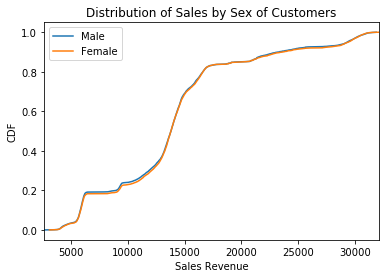

In [38]:
# Distribution of Sales by Gender using CDF

cdf_male_sales = Cdf.from_seq(male_sales)
cdf_male_sales.plot(label="Male")

cdf_female_sales = Cdf.from_seq(female_sales)
cdf_female_sales.plot(label="Female")

plt.xlabel("Sales Revenue")
plt.ylabel("CDF")
plt.title("Distribution of Sales by Sex of Customers")
plt.legend();

In [41]:
# Is normal distribution a good model for the distribution of ages in the dataset?

from scipy.stats import norm
xs = np.linspace(42,94)
ys = norm(0,1).cdf(xs)

In [42]:
cdf_age = Cdf.from_seq(age)

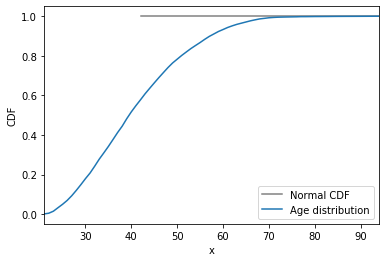

In [43]:
plt.plot(xs,ys,color='gray',label='Normal CDF')
cdf_age.plot(label="Age distribution")

plt.xlabel("x")
plt.ylabel("CDF")
plt.legend();

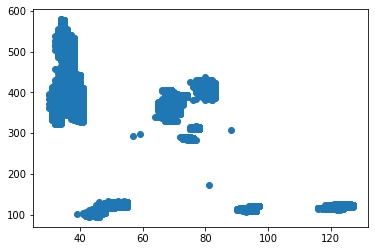

In [55]:
# Scatter plot of Quantity vs price of the commodity


plt.scatter(df["Quantity"], df['UnitPrice'])
plt.show()

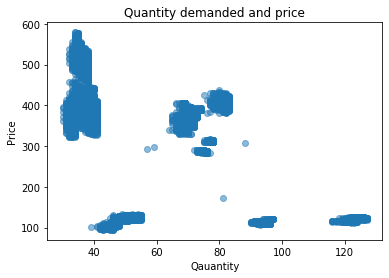

In [58]:
plt.scatter(df["Quantity"], df['UnitPrice'], alpha=0.5)
plt.title('Quantity demanded and price')
plt.xlabel('Qauantity')
plt.ylabel('Price')
plt.show()

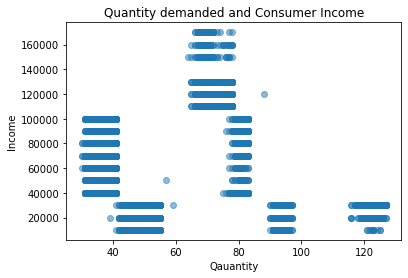

In [59]:
# Scatter plot of Quantity vs Income of the consumer

plt.scatter(df["Quantity"], df['Income'], alpha=0.5)
plt.title('Quantity demanded and Consumer Income')
plt.xlabel('Qauantity')
plt.ylabel('Income')
plt.show()


In [60]:
#  Demand seems to trend downwards indicating lower demand with higher income

In [61]:
# Obtain the correlation matrix

corrMatrix = df.corr()
print (corrMatrix)

           Quantity  UnitPrice    Income     Sales  Discount       Age
Quantity   1.000000  -0.496735 -0.139909  0.270648  0.300623  0.019692
UnitPrice -0.496735   1.000000  0.602715  0.613292  0.462454  0.069300
Income    -0.139909   0.602715  1.000000  0.581610  0.471369  0.158343
Sales      0.270648   0.613292  0.581610  1.000000  0.809422  0.106665
Discount   0.300623   0.462454  0.471369  0.809422  1.000000  0.035138
Age        0.019692   0.069300  0.158343  0.106665  0.035138  1.000000


In [63]:
alpha = 0.05

t_value,p_value=stats.ttest_rel(df['Sales'],df['Income'])

one_tailed_p_value=float("{:.6f}".format(p_value/2)) 

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for one_tailed_test is %f'%one_tailed_p_value)

alpha = 0.05

if one_tailed_p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. 

So we conclude that Income has effect on sales. i.e., d = 0 at %.2f level of significance.'''%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. 

So we conclude that income has no effect on sales. i.e., d = 0 at %.2f level of significance.'''%alpha)


Test statistic is -202.252583
p-value for one_tailed_test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. 

So we conclude that Income has effect on sales. i.e., d = 0 at 0.05 level of significance.


In [64]:

from scipy.stats.mstats import zscore

In [67]:
reg1 = smf.ols("np.log(Sales) ~ np.log(UnitPrice) + np.log(Income) + np.log(Age) + Gender + Education + np.log(Discount) + MaritalStatus",data=df).fit(cov_type="HC3")

In [68]:
reg2 = smf.ols("np.log(Quantity) ~ np.log(UnitPrice) + np.log(Income) + np.log(Age) + Gender + Education + np.log(Discount) + MaritalStatus",data=df).fit(cov_type="HC3")

In [69]:
from stargazer.stargazer import Stargazer

In [70]:
stargazer = Stargazer([reg1,reg2])
HTML(stargazer.render_html())